<a href="https://colab.research.google.com/github/KacperKaszuba0608/Projects/blob/main/StorytellingDataVisualizationonExchangeRates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Storytelling Data Visualization on Exchange Rates

In this project a I want to show some Visualizaton on dataset `euro-daily-hist_1999_2020`. The data describes Euro daily exchange rates between 1999 and 2021. Each column describe a different currency. Dataset is available on Kaggle and the source is the European Central Bank. My data is shorter than curent dataset because DATAQUEST downloaded it on January 2021. If you want to see original data, you can follow this [link](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020).

## Importing necessary libraries and reading file

In [12]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading file
url = 'https://raw.githubusercontent.com/KacperKaszuba0608/Datasets/main/euro-daily-hist_1999_2020.csv'

data = pd.read_csv(url)

## Introducing the Dataset

This dataset has 5699 rows and 41 column. Some of columns have null values, so I have to clean my data. Most of values have `object` type only 3 of them has `float64`. Data is ordered from older to younger. I mean last rows is from 1999 and first is from 2021. Values was collected daily since 04-01-1999 to 08-01-2021.

## Data Cleaning in `[US-dollar]` column

Column names didn't need parentheses, so I should change it. But at first I change just `[US dollar]` column name and focus on it. 

First row is a date value, so it will be easier to working with `datetime` type. That's why I have to change the type of values in first column. Then I sort values in ascending order and reset the index.

In [7]:
data.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
data['Time'] = pd.to_datetime(data['Time'])
data.sort_values('Time', inplace=True)
data.reset_index(drop=True, inplace=True)

After some cleaning, now I'm creating separate DataFrame with `time` and `US_dollar`. Then I count values in my new frame.

In [8]:
euro_to_dollar = data[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
1.2571     1
1.2610     1
1.2651     1
1.2632     1
1.2193     1
Name: US_dollar, Length: 3528, dtype: int64

As we see above in data I have some missing value with '-' sign. So now I have to remove rows with this sign.

In [9]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


<ipython-input-9-acfddb10b548>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)


After whole cleaning the result is a DataFrame with 2 columns `Time` and `US_dollar` with values type `datetime` and `float`.

## Rolling Mean

In this part of project I want to plot a figure which will be nice for an eye. When I create plot from my curent data it will be very vary and not smooth. That'w why I use rolling mean. Thanks to this arithmetical method I can show you better figure than first one.

At first I create a column `rolling_mean` for `US_dollar` and add it to DataFrame `euro_to_dollar`.

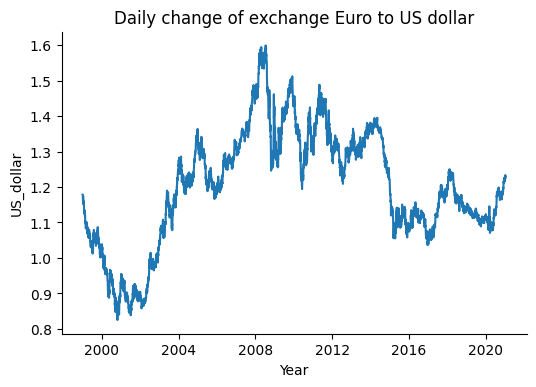

In [ ]:
fig, ax = plt.subplots()
ax.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Daily change of exchange Euro to US dollar')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Year')
plt.ylabel('US_dollar')
plt.show()

In [ ]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

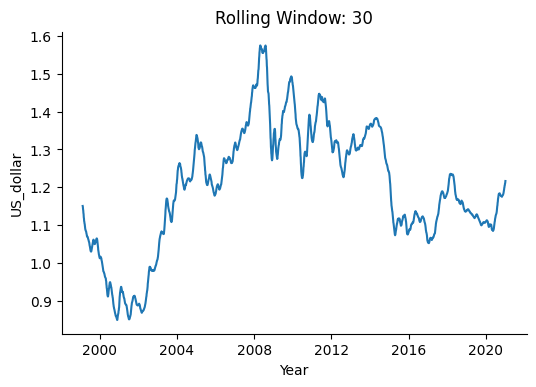

In [ ]:
fig, ax = plt.subplots()
ax.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Rolling Window: 30')
plt.xlabel('Year')
plt.ylabel('US_dollar')
plt.show()

As we see above the value of US dollar very change during analyzing time. Significant increase is between 2002 and 2005 year, then small decrease and again huge rise and the reach peak of exchange is in 2008 year.

## Coming up with an Idea

Now, I want to show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)).

## Preparing data

Below I prepare four frames:
1. Whole data to join result;
2. Data for Bush's reign;
3. Data for Obama's reign;
4. Data for Trump's reign.

In [ ]:
plot_data = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2001) &  (euro_to_dollar['Time'].dt.year < 2021)]
bush = plot_data.copy()[(plot_data['Time'].dt.year < 2009)]
obama = plot_data.copy()[(plot_data['Time'].dt.year >= 2009) & (plot_data['Time'].dt.year < 2017)]
trump = plot_data.copy()[(plot_data['Time'].dt.year >= 2017) & (plot_data['Time'].dt.year < 2021)]

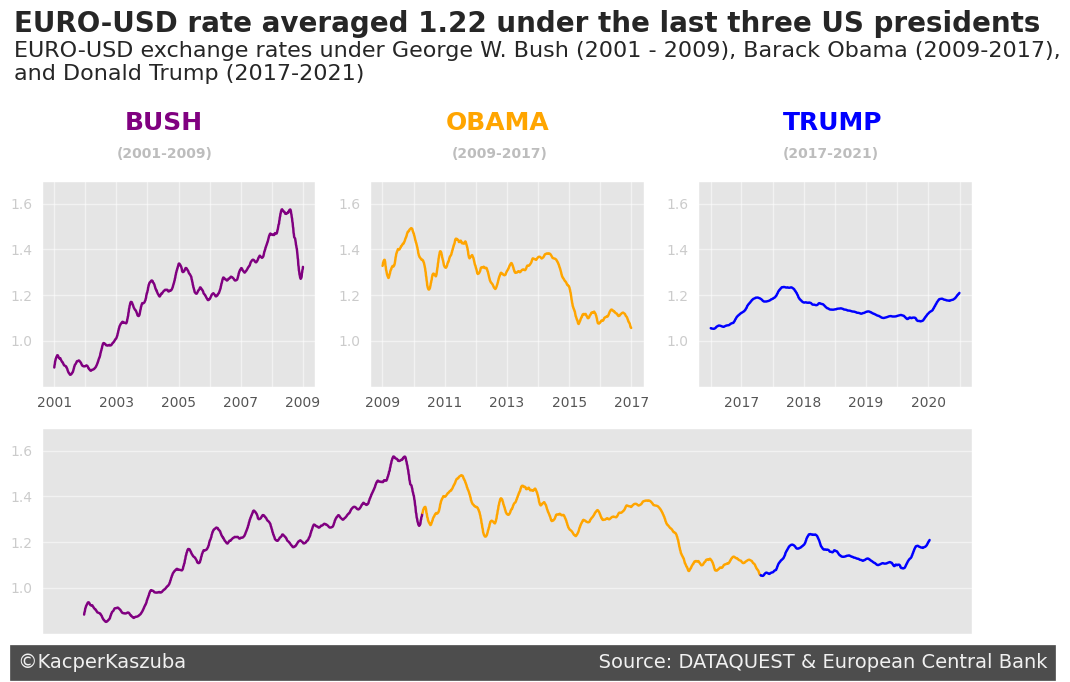

In [ ]:
### Adding the subplots
import matplotlib.style as style

style.use('ggplot')

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]
locations = ['top', 'right', 'bottom', 'left']

for ax, loc in zip(axes, locations):
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)

# Bush's plot
ax1.plot(bush['Time'], bush['rolling_mean'], color = 'purple')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'])
ax1.text(731316.0, 1.92, 'BUSH', fontsize=18, weight='bold', color='purple')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold', alpha=0.3)

# Obama's plot
ax2.plot(obama['Time'], obama['rolling_mean'], color = 'orange')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'])
ax2.text(734156.0, 1.92, 'OBAMA', fontsize=18, weight='bold', color='orange')
ax2.text(734216.0, 1.8, '(2009-2017)', weight='bold', alpha=0.3)

# Trump's plot
ax3.plot(trump['Time'], trump['rolling_mean'], color = 'blue')
ax3.set_xticklabels(['', '2017', '', '2018', '', '2019', '', '2020', '', '2021'])
ax3.text(736756.0, 1.92, 'TRUMP', fontsize=18, weight='bold', color='blue')
ax3.text(736756.0, 1.8, '(2017-2021)', weight='bold', alpha=0.3)

# plot all data together
ax4.plot(bush['Time'], bush['rolling_mean'], color='purple')
ax4.plot(obama['Time'], obama['rolling_mean'], color='orange')
ax4.plot(trump['Time'], trump['rolling_mean'], color='blue')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

# title, subtitle and signature
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''', fontsize=16)

ax4.text(729916.0, 0.65, '©KacperKaszuba' + ' '*66 + 'Source: DATAQUEST & European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()

## Conclusion

On above figure you can see change of EURO-USD rate in years 2001 to 2021. First 3 plots show rate during each president's reign. 

As we see only George W. Bush's reign had beneficial improve on EURO-USD rate, but last year in his term of office was terrible for rate of currency and then Barack Obama took reign in United States of America. 

He tried to rise rate up and through long time the results was good. But at the end of 2014 year the rate of exchange EURO to USD drop quickly and to end of his cadence was lower than average under the last three US presidents.

In 2017 reign took Donald Trump. Firstly the currency strated to raising, then litle bit droped and again started to increasing.

Increase in exchange rate means the currency is weaker than other. That's why it is desirable to decrease the exchange rate. We can say, Barak Obama and Donald Trump had the greatest impact on countries' currency.